In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iterno_orig=np.loadtxt("iterno_orig.dat")
iterno_apio=np.loadtxt("iterno_apio.dat")
no=iterno_orig[0]
#Last iteration interrupted 37th and 92nd iterations not finished (no timings for those) Total 1810 instead of 1812
for i in range(len(iterno_orig)):
    if (iterno_orig[i]!=no):
        iterno_orig[i]=iterno_orig[i]-1

In [3]:
print(iterno_orig)
print(iterno_apio)

[99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 36. 99. 99. 99. 99. 99. 99.
 91.]
[99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99.
 99.]


In [4]:
print(sum(iterno_orig))
print(sum(iterno_apio))

1810.0
1881.0


In [5]:
apio_io=np.loadtxt("apio_io.dat")
orig_io=np.loadtxt("orig_io.dat")
#x_apio=np.linspace(0,len(apio_io),len(apio_io))
#x_orig=np.linspace(0,len(orig_io),len(orig_io))
if len(apio_io)>len(orig_io):
    apio_io=np.delete(apio_io,np.where(iterno_orig!=no)[0])
elif len(apio_io)<len(orig_io):
    orig_io=np.delete(orig_io,np.where(iterno_apio!=no)[0])

In [6]:
print(len(orig_io))
print(len(apio_io))

17
17


In [7]:
orig_io_step=np.loadtxt("orig_io_step.dat")
orig_comp_step=np.loadtxt("orig_comp_step.dat")
apio_io_step=np.loadtxt("apio_io_step.dat")

In [8]:
print(len(orig_comp_step))
print(len(orig_io_step))

1812
1810


In [9]:
i1=np.where(iterno_orig!=no)[0][0]
i2=np.where(iterno_orig!=no)[0][1]
if len(orig_comp_step)>len(orig_io_step):   
    orig_comp_step=np.delete(orig_comp_step,[int(no*i1+iterno_orig[i1]), int(no*(i2-1)+iterno_orig[i1]+iterno_orig[i2])])
else:
    orig_io_step=np.delete(orig_io_step,[int(no*i1+iterno_orig[i1]), int(no*(i2-1)+iterno_orig[i1]+iterno_orig[i2])])

Text(0.5, 0, 'iteration')

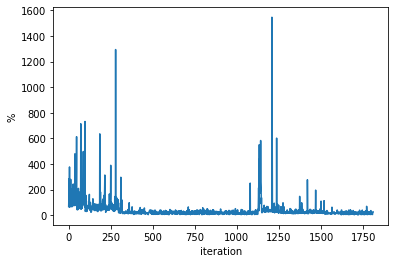

In [10]:
vec2=(orig_comp_step/orig_io_step)*100
plt.plot(vec2)
plt.ylabel("%")
plt.xlabel("iteration")

In [11]:
diff=len(orig_io_step)-len(apio_io_step)

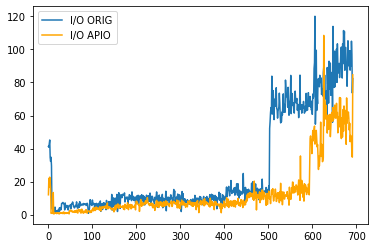

In [12]:
#fig,ax=plt.subplots(1,2,figsize=(20,5))
plt.plot(orig_io_step[diff:],label="I/O ORIG")
plt.plot(apio_io_step,label="I/O APIO",c="orange")
plt.legend()

#ax[0].legend()
#ax[1].legend()

Text(0.5, 0, '# iteration')

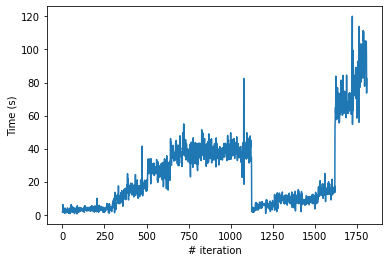

In [13]:
plt.plot(orig_io_step,label="IO ORIG")
#plt.title("writing I/O time per iteration")
plt.ylabel("Time (s)")
plt.xlabel("# iteration")

Text(12.2, 6100, '')

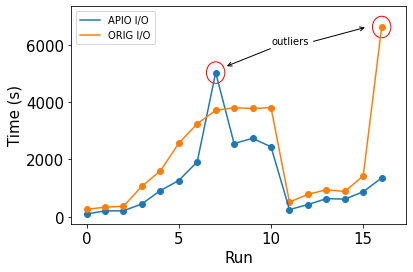

In [14]:
import matplotlib.patches as mpatches
fig,ax=plt.subplots()
p = mpatches.Ellipse((7,apio_io[7]), width=1,height=750,fill=0,color='r')
ax.add_patch(p)
ax.plot()
ax.plot(apio_io, label="APIO I/O")
#ax.plot(np.linspace(8,16,9),apio_io[8:17],c='tab:blue')
ax.scatter(np.linspace(0,16,17),apio_io)
ax.plot(orig_io,label="ORIG I/O",c='tab:orange')
ax.scatter(np.linspace(0,16,17),orig_io)
ax.legend()
ax.set_ylabel("Time (s)",fontsize=15)
ax.set_xlabel("Run",fontsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.annotate(text='outliers', xy=(7.5,apio_io[7]+200), xytext=(10,apio_io[7]+1000), arrowprops=dict(arrowstyle='->'))
#ax.plot([6,8],[apio_io[6],apio_io[8]],c='tab:blue',ls='dashed')
q = mpatches.Ellipse((16,orig_io[16]), width=1,height=750,fill=0,color='r')
ax.add_patch(q)
ax.plot()
ax.annotate(text='', xy=(15.2,orig_io[16]), xytext=(12.2,6100), arrowprops=dict(arrowstyle='->'))

In [15]:
#plt.hist(orig_io)

[]

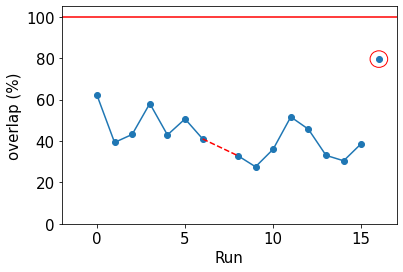

In [16]:
std_orig_io=np.std(orig_io)
std_apio_io=np.std(apio_io)
vec=(orig_io-apio_io)*100/orig_io
fig,ax=plt.subplots()
ax.plot(vec[0:7])
ax.scatter(np.linspace(0,6,7),vec[0:7])
ax.plot(np.linspace(8,15,8),vec[8:16],c='tab:blue')
ax.scatter(np.linspace(8,16,9),vec[8:17],c='tab:blue')
ax.axhline(100,-1,9,c='r')
ax.set_ylabel("overlap (%)",fontsize=15)
ax.set_xlabel("Run",fontsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.set_ylim(0,105)
ax.set_xlim(-2,17)
ax.plot([6,8],[vec[6],vec[8]],c='r',ls='dashed')
q = mpatches.Ellipse((16,vec[16]), width=1,height=8,fill=0,color='r')
ax.add_patch(q)
ax.plot()

In [19]:
vector=vec[[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15]]
print("mean:",np.mean(vector))
print("std:",np.std(vector))
print("max:",np.max(vector))
print("min:",np.min(vector))

mean: 42.21092847549653
std: 9.689083836355596
max: 62.152644408783175
min: 27.533939697954885


In [18]:
avg=[]
err=[]
acc=0
for i in iterno_orig[iterno_orig==no]:
    interval=vec2[acc:acc+int(i)]
    avg.append(sum(interval)/int(i))
    err.append(1.96*(np.std(interval)/np.sqrt(int(i))))
    acc+=int(i)
avg=np.asarray(avg)

In [18]:
avg
len(avg)

17

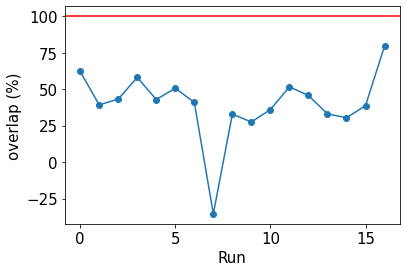

In [19]:
fig,ax=plt.subplots()
x=np.linspace(0,16,17)
#ax.plot(x,avg,label="average max overlap")
#ax.fill_between(x, avg-err, avg+err)
ax.plot(x, vec)
ax.scatter(np.linspace(0,16,17),vec)
ax.axhline(100,-1,14,c='red')
ax.set_ylabel("overlap (%)",fontsize=15)
ax.set_xlabel("Run",fontsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
#ax.set_ylim(0,105)